In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("Data/county_data_clean.csv")

## Dataframes for States and Counties

In [4]:
df_states = df[df["county_fips_code"] == 0] #Dataframe for states only

In [5]:
df_counties = df[df["county_fips_code"] != 0] #Dataframe for counties only

In [6]:
df_counties = df_counties.set_index("name")

In [7]:
df_counties = df_counties.drop(["Unnamed: 0"],axis=1)

## Missing Values by Column

In [8]:
df_missing_columns = round(df_counties.isna().mean().sort_values(),4)

In [9]:
df_missing_columns = df_missing_columns[df_missing_columns > 0]

In [10]:
df_missing_columns

median_household_income                                                0.0003
children_in_single_parent_households                                   0.0003
uninsured_children                                                     0.0003
children_in_poverty                                                    0.0003
uninsured_adults                                                       0.0003
severe_housing_cost_burden                                             0.0003
unemployment                                                           0.0003
uninsured                                                              0.0003
access_to_exercise_opportunities                                       0.0019
%_rural                                                                0.0022
flu_vaccinations                                                       0.0051
mammography_screening                                                  0.0060
food_environment_index                                          

### Here are some observations:

* total_female_population and total_male_population (and subgroups such as total_female_population_0_17) have high values of missingness - this is strange as %_females and population are both complete. Although we can consider completing these columns, I think deleting them is fine since the information that they include can be obtained from the other columns. 

* Other columns with high missingness need to be looked at closely and either completed or deleted. I think if they might not relate to our analysis, we should delete them. But if they do - then we can use methods such as multiple imputation to complete them. Also columns with above 80% missingness should be deleted.


In [11]:
# Columns I propose we delete.

col_delete = df_missing_columns[df_missing_columns >= 0.8]
col_delete

child_mortality_white                             0.8024
child_mortality_black                             0.8383
infant_mortality_white                            0.8708
child_mortality_hispanic                          0.8810
infant_mortality_black                            0.8886
infant_mortality_hispanic                         0.9262
communicable_disease                              0.9771
female_population_65                              0.9771
female_population_45_64                           0.9771
female_population_18_44                           0.9771
female_population_0_17                            0.9771
total_male_population                             0.9771
male_population_65                                0.9771
male_population_45_64                             0.9771
male_population_18_44                             0.9771
male_population_0_17                              0.9771
year_structure_built                              0.9771
injury_hospitalizations        

In [12]:
df_counties = df_counties.drop(col_delete.index, axis=1)

## Missing Values after Deleting Columns

In [13]:
df_missing_values = round(df_counties.isna().mean().sort_values(),4)

In [14]:
df_missing_values = df_missing_values[df_missing_values > 0]

In [15]:
df_missing_values

children_in_single_parent_households                                   0.0003
children_in_poverty                                                    0.0003
severe_housing_cost_burden                                             0.0003
uninsured_adults                                                       0.0003
uninsured_children                                                     0.0003
median_household_income                                                0.0003
unemployment                                                           0.0003
uninsured                                                              0.0003
access_to_exercise_opportunities                                       0.0019
%_rural                                                                0.0022
flu_vaccinations                                                       0.0051
food_environment_index                                                 0.0060
limited_access_to_healthy_foods                                 

## Missing Values by State

In [16]:
missing_values_state = {}
for col in df_missing_values.index:
    missing_values_state[col] = df_counties[df_counties[col].isnull()]["state_abbreviation"].values

In [17]:
for pair in missing_values_state:
    print(pair)
    print(missing_values_state[pair])

children_in_single_parent_households
['HI']
children_in_poverty
['HI']
severe_housing_cost_burden
['TX']
uninsured_adults
['HI']
uninsured_children
['HI']
median_household_income
['HI']
unemployment
['HI']
uninsured
['HI']
access_to_exercise_opportunities
['AK' 'AK' 'AK' 'AK' 'AK' 'AK']
%_rural
['AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'SD']
flu_vaccinations
['AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'HI' 'TX'
 'TX' 'VA']
food_environment_index
['GA' 'IL' 'IN' 'IN' 'KY' 'KY' 'KY' 'MI' 'MS' 'NC' 'NC' 'TN' 'TX' 'VA'
 'VA' 'VA' 'VA' 'VA' 'WI']
limited_access_to_healthy_foods
['GA' 'IL' 'IN' 'IN' 'KY' 'KY' 'KY' 'MI' 'MS' 'NC' 'NC' 'TN' 'TX' 'VA'
 'VA' 'VA' 'VA' 'VA' 'WI']
mammography_screening
['AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'AK' 'HI'
 'ND' 'TX' 'TX' 'TX' 'VA']
ratio_of_population_to_primary_care_providers_other_than_physicians
['AR' 'CO' 'GA' 'IL' 'KS' 'MN' 'MO' 'MO' 'MT' 'NE' 'NV' 'NC' 'NC' 'TX'
 'TX' 'TX' 'TX' 'TX' 'VA' 'VA' 'VA' 'VA' 'VA' 'VA' 'VA' '

In [18]:
state_counts = np.concatenate(list(missing_values_state.values()))
unique, counts = np.unique(state_counts, return_counts=True)
state_counts = dict(zip(unique, counts))

In [19]:
state_counts = pd.Series(state_counts)
state_counts = state_counts.sort_values(ascending=False)
state_counts/(sum(df_counties.isnull().sum()))

TX    0.066366
NE    0.054944
KS    0.051933
KY    0.048569
MO    0.048152
IA    0.047864
SD    0.042193
MN    0.037932
IL    0.037516
ND    0.033767
IN    0.033751
MT    0.033191
VA    0.033047
GA    0.032582
TN    0.029314
MI    0.026287
WI    0.026271
WV    0.024557
CO    0.023580
OK    0.022026
AR    0.021449
OH    0.021177
ID    0.019383
AK    0.017524
MS    0.017108
PA    0.014881
NC    0.014000
UT    0.011085
AL    0.010636
OR    0.010540
NY    0.010092
WY    0.009611
WA    0.009227
LA    0.008426
NM    0.007737
VT    0.006119
CA    0.006071
NV    0.006039
ME    0.005703
FL    0.005302
SC    0.004629
NH    0.002771
MD    0.001570
HI    0.001474
MA    0.001474
AZ    0.001265
RI    0.000673
CT    0.000080
DE    0.000048
NJ    0.000048
DC    0.000016
dtype: float64

## What columns should we keep?

We really only care about what social and economic factors affect uninsured rate - so I'm considering picking columns that fall under those categories:

###### children_in_single_parent_households                                   0.0003
###### children_in_poverty                                                    0.0003
severe_housing_cost_burden                                             0.0003
##### uninsured_adults                                                       0.0003
uninsured_children                                                     0.0003
###### median_household_income                                                0.0003
###### unemployment                                                           0.0003
uninsured                                                              0.0003
access_to_exercise_opportunities                                       0.0019
###### %_rural                                                                0.0022
flu_vaccinations                                                       0.0051
food_environment_index                                                 0.0060
limited_access_to_healthy_foods                                        0.0060
mammography_screening                                                  0.0060
ratio_of_population_to_primary_care_providers_other_than_physicians    0.0083
other_primary_care_providers                                           0.0083
alcohol_impaired_driving_deaths                                        0.0105
air_pollution__particulate_matter                                      0.0108
preventable_hospital_stays                                             0.0121
drinking_water_violations                                              0.0137
premature_death                                                        0.0194
premature_age_adjusted_mortality                                       0.0194
###### life_expectancy                                                        0.0220
dentists                                                               0.0271
ratio_of_population_to_dentists                                        0.0271
###### high_school_graduation                                                 0.0315
injury_deaths                                                          0.0328
low_birthweight                                                        0.0341
children_eligible_for_free_or_reduced_price_lunch                      0.0385
primary_care_physicians                                                0.0430
ratio_of_population_to_primary_care_physicians                         0.0430
teen_births                                                            0.0458
sexually_transmitted_infections                                        0.0503
violent_crime                                                          0.0608
ratio_of_population_to_mental_health_providers                         0.0802
mental_health_providers                                                0.0802
###### children_in_poverty_white                                              0.0980
residential_segregation__non_white_white                               0.1104
###### median_household_income_white                                          0.1292
motor_vehicle_crash_deaths                                             0.1407
###### children_in_poverty_hispanic                                           0.1496
###### median_household_income_hispanic                                       0.2202
hiv_prevalence                                                         0.2285
flu_vaccinations_white                                                 0.2683
firearm_fatalities                                                     0.2969
###### residential_segregation__black_white                                   0.3447
###### children_in_poverty_black                                              0.3616
mammography_screening_white                                            0.3743
###### median_household_income_black                                          0.3842
teen_births_white                                                      0.3870
###### child_mortality                                                        0.3889
flu_vaccinations_black                                                 0.4109
flu_vaccinations_hispanic                                              0.4153
low_birthweight_white                                                  0.4220
preventable_hospital_stays_white                                       0.4351
life_expectancy_white                                                  0.4507
drug_overdose_deaths                                                   0.4526
driving_alone_to_work_white                                            0.4714
premature_age_adjusted_mortality_white                                 0.4968
premature_death_white                                                  0.4971
teen_births_hispanic                                                   0.4987
mammography_screening_black                                            0.5083
preventable_hospital_stays_black                                       0.5286
disconnected_youth                                                     0.5506
low_birthweight_hispanic                                               0.5532
low_birthweight_black                                                  0.5579
teen_births_black                                                      0.5582
mammography_screening_hispanic                                         0.5605
premature_age_adjusted_mortality_black                                 0.5694
premature_death_black                                                  0.5697
life_expectancy_black                                                  0.5738
driving_alone_to_work_hispanic                                         0.5913
homicides                                                              0.5952
infant_mortality                                                       0.5990
life_expectancy_hispanic                                               0.6031
driving_alone_to_work_black                                            0.6251
preventable_hospital_stays_hispanic                                    0.6763
premature_age_adjusted_mortality_hispanic                              0.7333
premature_death_hispanic                                               0.7333

## Exploring Above Chosen Columns

In [20]:
df_missing_values = round(df_counties.isna().mean().sort_values(),4)

In [21]:
df_counties_col = df_missing_values[df_missing_values == 0].index.tolist()

In [22]:
other_col = ["children_in_single_parent_households", 
            "uninsured_adults",
            "children_in_poverty",
            "children_in_poverty_black",
            "children_in_poverty_white",
            "children_in_poverty_hispanic",
            "unemployment",
            "%_rural",
            "life_expectancy",
            "high_school_graduation",
            "median_household_income",
            "median_household_income_white",
            "median_household_income_hispanic",
            "median_household_income_black",
            "child_mortality"]

In [23]:
df_counties_explore = df_counties[df_counties_col + other_col]

In [24]:
df_corr = df_counties_explore.corr()["uninsured_adults"].sort_values()

In [25]:
df_corr

%_non_hispanic_white                                                   -0.552917
some_college                                                           -0.495526
excessive_drinking                                                     -0.387327
median_household_income                                                -0.384102
life_expectancy                                                        -0.274012
median_household_income_white                                          -0.215341
median_household_income_black                                          -0.201048
median_household_income_hispanic                                       -0.183605
homeownership                                                          -0.147936
high_school_graduation                                                 -0.115087
social_associations                                                    -0.102621
%_asian                                                                -0.101292
%_65_and_older              

In [26]:
df_counties_explore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3142 entries, Autauga County to Weston County
Data columns (total 52 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   state_fips_code                                                       3142 non-null   int64  
 1   homeownership                                                         3142 non-null   float64
 2   insufficient_sleep                                                    3142 non-null   float64
 3   food_insecurity                                                       3142 non-null   float64
 4   diabetes_prevalence                                                   3142 non-null   float64
 5   frequent_mental_distress                                              3142 non-null   float64
 6   frequent_physical_distress                                            3142 non-

## Visualizing Uninsured Rate of Adults for Different Racial Subgroups of Population

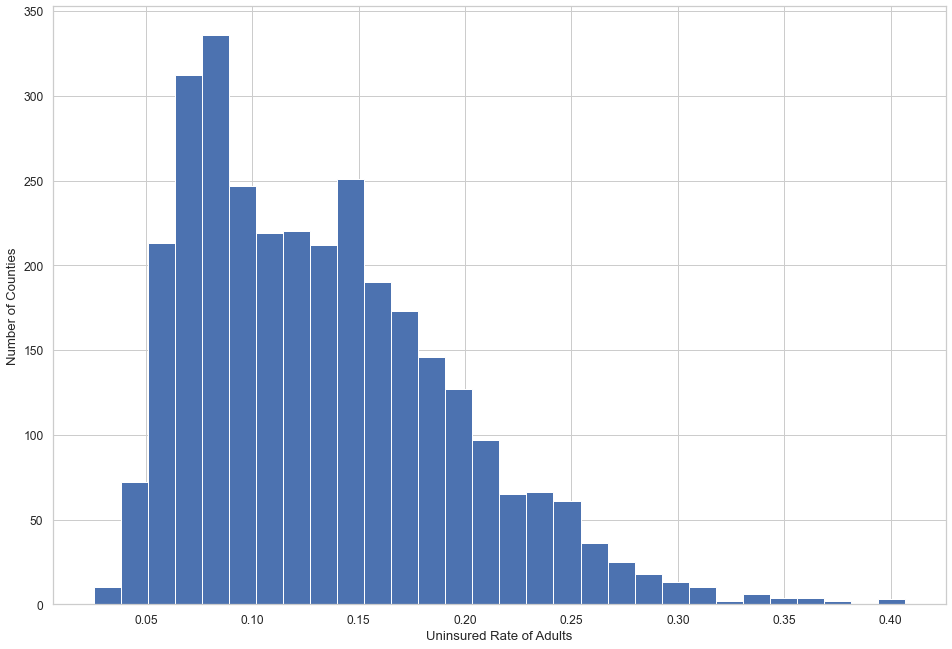

In [27]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [16, 11]})
sns.distplot(
    df_counties_explore['uninsured_adults'], norm_hist=False, kde=False, bins=30, hist_kws={"alpha": 1}
).set(xlabel='Uninsured Rate of Adults', ylabel='Number of Counties');

In [28]:
racial_groupings = ["%_non_hispanic_white",
                   "%_hispanic",
                   "%_non_hispanic_african_american",
                   "%_asian",
                   "%_american_indian_and_alaskan_native",
                   "%_native_hawaiian_other_pacific_islander"]

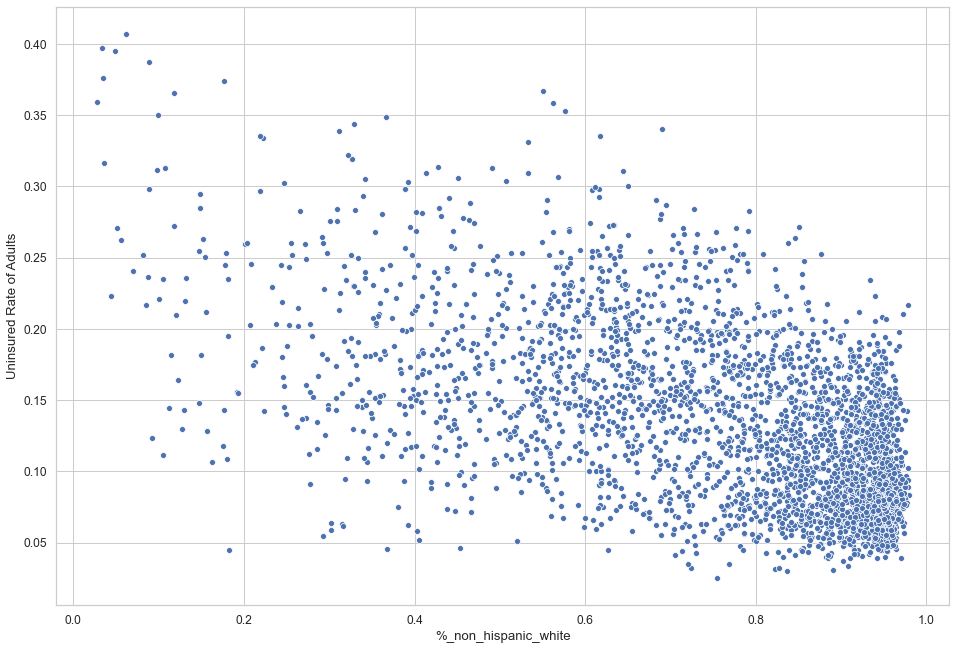

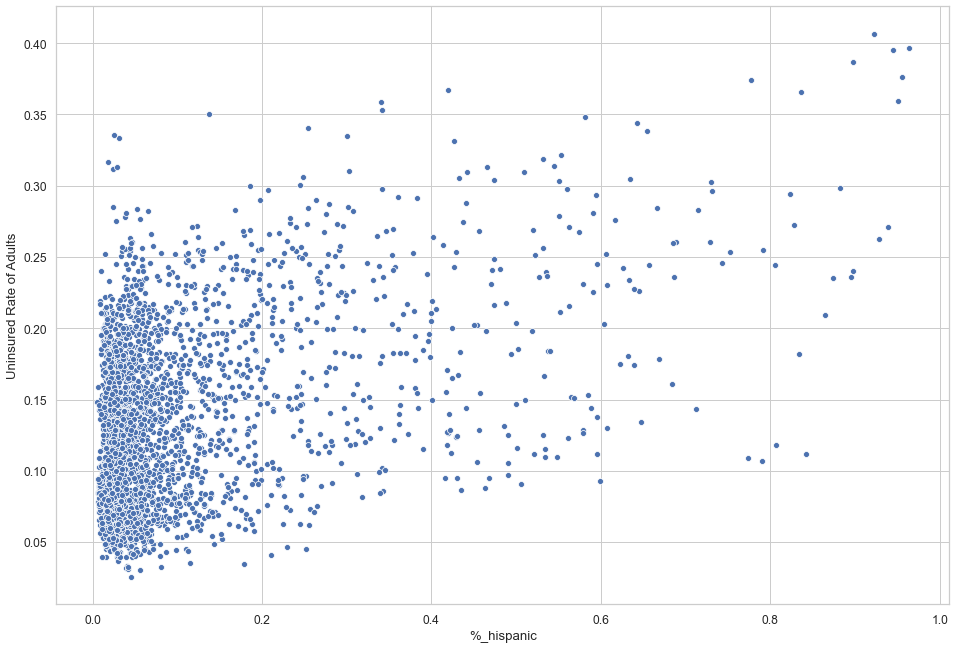

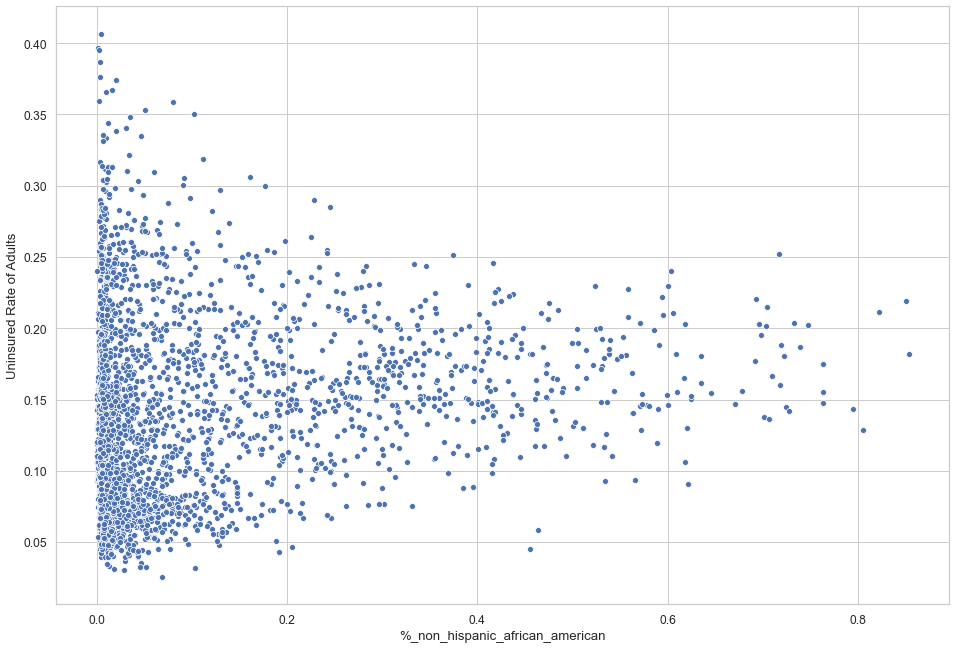

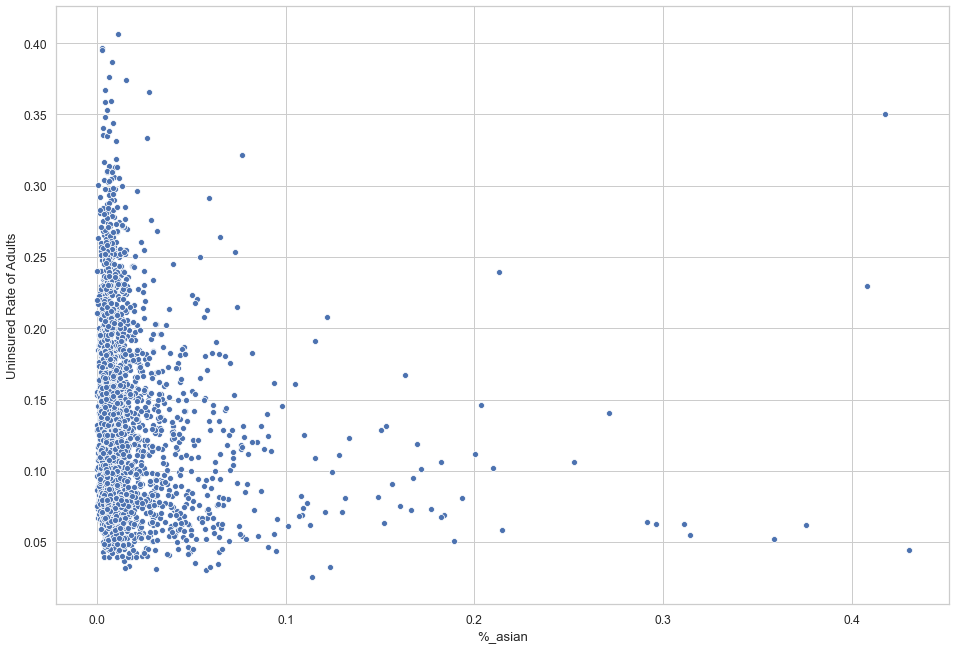

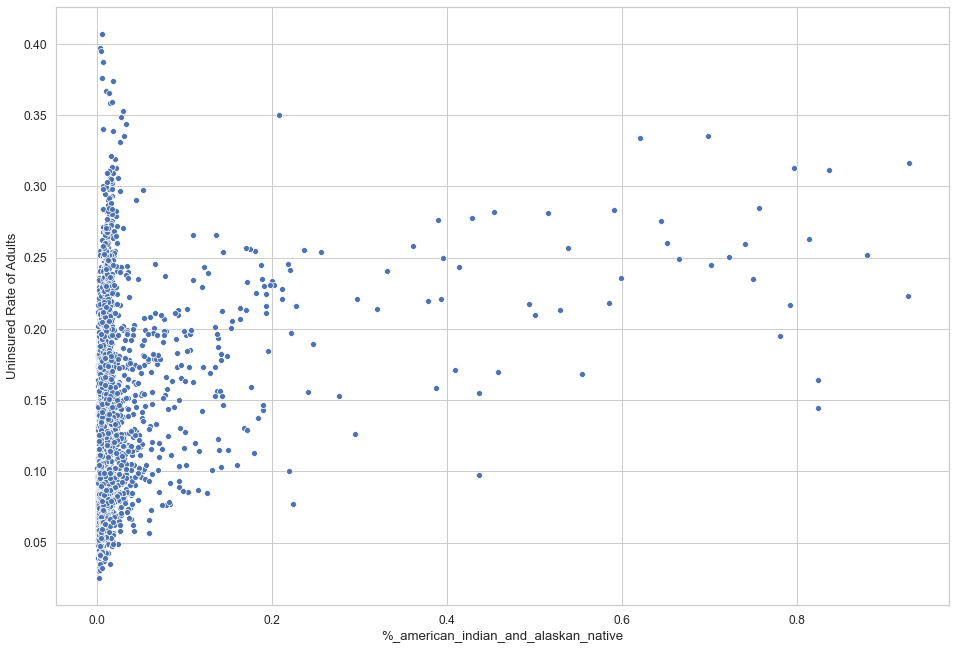

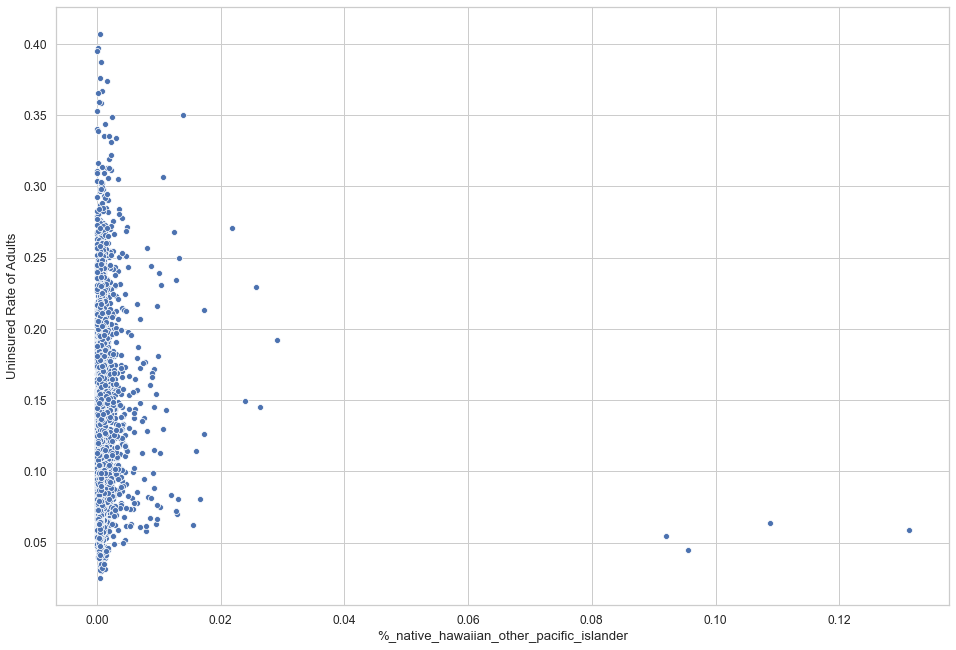

In [29]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [16, 11]})
for group in racial_groupings:
    plt.figure()
    sns.scatterplot(x=df_counties_explore[group], y=df_counties_explore['uninsured_adults']
               ).set(xlabel= group, ylabel='Uninsured Rate of Adults')

## Uninsured Rate for Females

[Text(0, 0.5, 'Uninsured Rate of Adults'),
 Text(0.5, 0, '% of Population that is Female')]

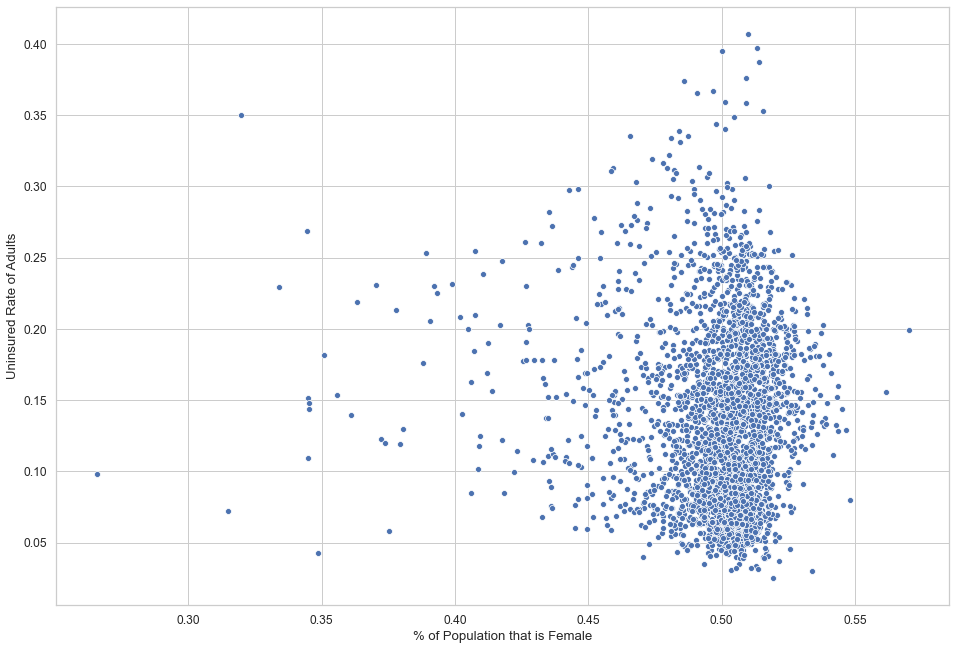

In [30]:
sns.scatterplot(x=df_counties_explore["%_females"], y=df_counties_explore['uninsured_adults']
               ).set(xlabel= "% of Population that is Female", ylabel='Uninsured Rate of Adults')

## Poor or Fair Health

[Text(0, 0.5, 'Uninsured Rate of Adults'),
 Text(0.5, 0, '% of Population with Poor or Fair Health')]

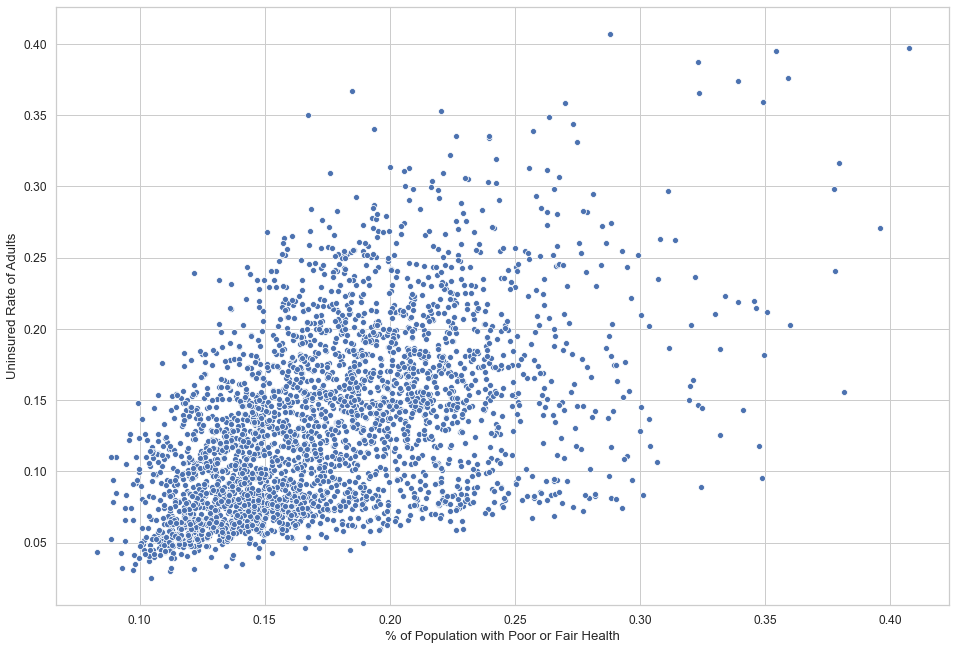

In [31]:
sns.scatterplot(x=df_counties_explore["poor_or_fair_health"], y=df_counties_explore['uninsured_adults']
               ).set(xlabel= "% of Population with Poor or Fair Health", ylabel='Uninsured Rate of Adults')